<a href="https://colab.research.google.com/github/shreya-rm/LGMVIP-DataScience/blob/main/lgm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LetsGrowMore - Virtual Internship Program

#Data Science Internship

**Task 2 : Stock Market Prediction and Forecasting Using Stacked LSTM**

*Author : Shreya RM*

**Importing Required Libraries**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [2]:
data_set = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data_set

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**Describing the data**

In [3]:
data_set.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
data_set.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


**Displaying the datatypes**

In [5]:
data_set.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [6]:
data_set['Date'].value_counts()

2017-11-14    1
2015-10-28    1
2016-05-05    1
2015-05-28    1
2013-10-11    1
             ..
2018-09-25    1
2014-01-01    1
2017-08-17    1
2012-02-15    1
2018-01-16    1
Name: Date, Length: 2035, dtype: int64

**Plotting the Graphs**

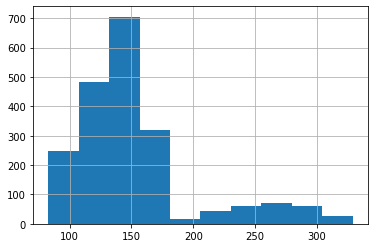

In [7]:
data_set['High'].hist()

<Figure size 1440x576 with 0 Axes>

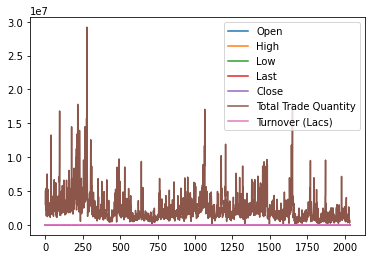

In [8]:
plt.figure(figsize=(20,8))
data_set.plot()

**Training the dataset**

In [9]:
data = data_set.filter(['Close'])
dataset = data_set.values
training_data_len = math.ceil(len(data_set)*8)
training_data_len

16280

In [10]:
dataset

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [11]:
data_set = data_set.iloc[:,0:5]
data_set

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [12]:
training_set = data_set.iloc[:,1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

**Scalling of data**

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range = (0,1))

data_training_scaled = scaler.fit_transform(training_set)

In [14]:
features_set = []
labels = []
for i in range(60,586):
   features_set.append(data_training_scaled[i-60:i,0])
   labels.append(data_training_scaled[i,0])

In [15]:
features_set, labels = np.array(features_set),np.array(labels)

In [16]:
features_set = np.reshape(features_set,(features_set.shape[0],features_set.shape[1],1))
features_set.shape

(526, 60, 1)

**Building the LSTM**

In [17]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [18]:
model = Sequential()

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(features_set,labels,epochs=50,batch_size=20)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 11/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 12/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 13/50
27/27 [==============================

In [ ]:
data_testing_complete = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data_testing_processed = data_testing_complete.iloc[:,1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


**Prediction of the data**

In [ ]:
data_total = pd.concat((data_set['Open'],data_set['Open']),axis=0)

In [ ]:
test_inputs = data_total[len(data_total) - len(data_set) - 60:].values
test_inputs.shape

(2095,)

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [ ]:
test_features = []
for i in range(60,89):
  test_features.append(test_inputs[i-60:i,0])

In [ ]:
test_features = np.array(test_features)
test_features = np.reshape(test_features,(test_features.shape[0], test_features.shape[1],1))
test_features.shape

(29, 60, 1)

In [ ]:
predictions = model.predict(test_features)
predictions

array([[[0.20600162],
        [0.21654502],
        [0.21654502],
        ...,
        [0.1650446 ],
        [0.15896188],
        [0.16626115]],

       [[0.21654502],
        [0.21654502],
        [0.2175588 ],
        ...,
        [0.15896188],
        [0.16626115],
        [0.6202352 ]],

       [[0.21654502],
        [0.2175588 ],
        [0.19870235],
        ...,
        [0.16626115],
        [0.6202352 ],
        [0.6222628 ]],

       ...,

       [[0.17092457],
        [0.16788322],
        [0.17477697],
        ...,
        [0.62206   ],
        [0.6455799 ],
        [0.67234385]],

       [[0.16788322],
        [0.17477697],
        [0.16443634],
        ...,
        [0.6455799 ],
        [0.67234385],
        [0.6605839 ]],

       [[0.17477697],
        [0.16443634],
        [0.14557989],
        ...,
        [0.67234385],
        [0.6605839 ],
        [0.64760745]]], dtype=float32)

In [ ]:
x_train = data_set[0:1256]
y_train = data_set[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [ ]:
x_train

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20


**The np.random.randn Function**

In [ ]:
np.random.seed(1)
np.random.randn(3,3)


array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

**Draw a single number from the normal distribution**

In [ ]:
np.random.normal(1)

0.7506296245225899

**Draw 5 Numbers from the normal distribution**

In [ ]:
np.random.normal(5)

6.4621079370449745

In [ ]:
np.random.seed(42)
np.random.normal(size = 1000, scale =100).std()

97.87262077473541

**PLOTTING THE RESULT**

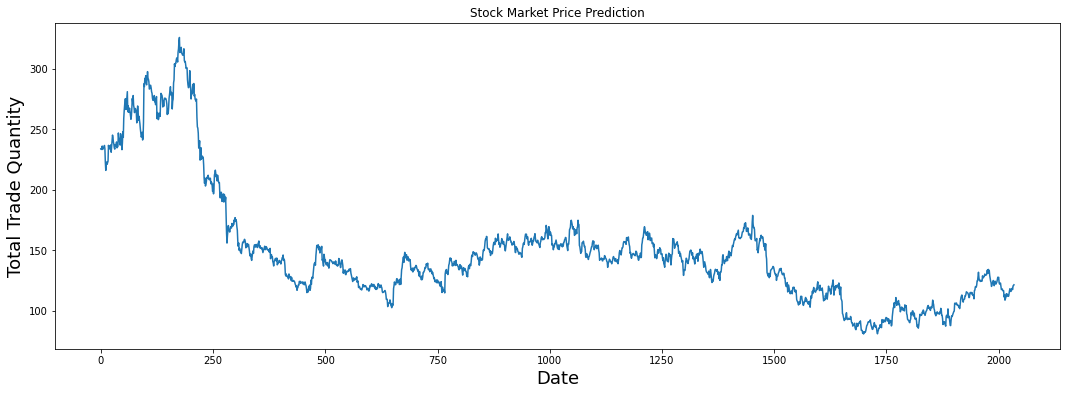

In [ ]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

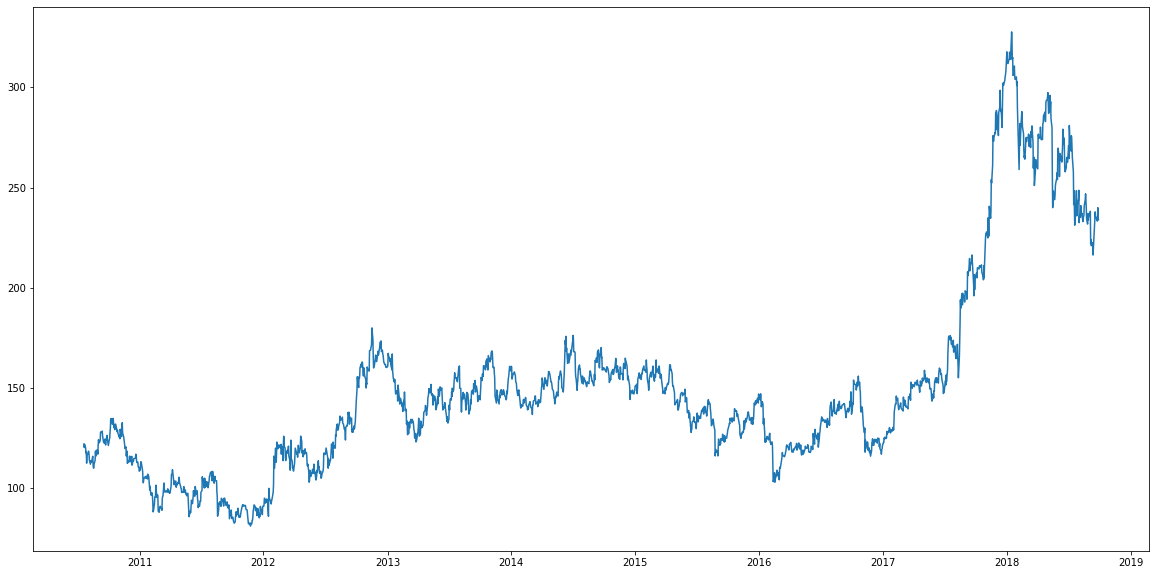

In [ ]:
#Analyse the closing prices from the dataframe:
data_set["Date"]=pd.to_datetime(data_set.Date)
data_set.index=data_set['Date']
#data_set.head()

plt.figure(figsize=(20,10))
plt.plot(data_set["Open"],label='ClosePriceHist')

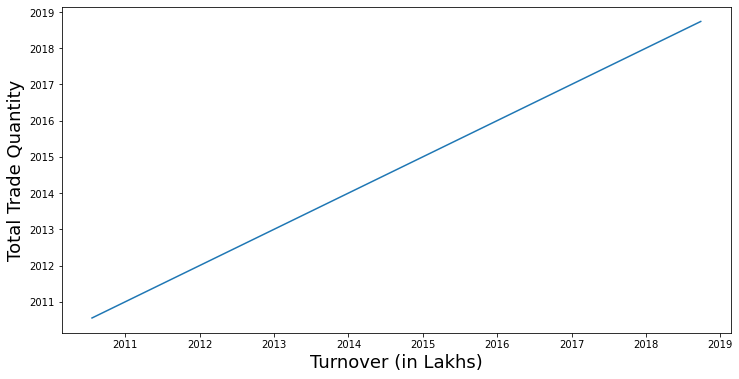

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data_set['Date'])
plt.xlabel('Turnover (in Lakhs)',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

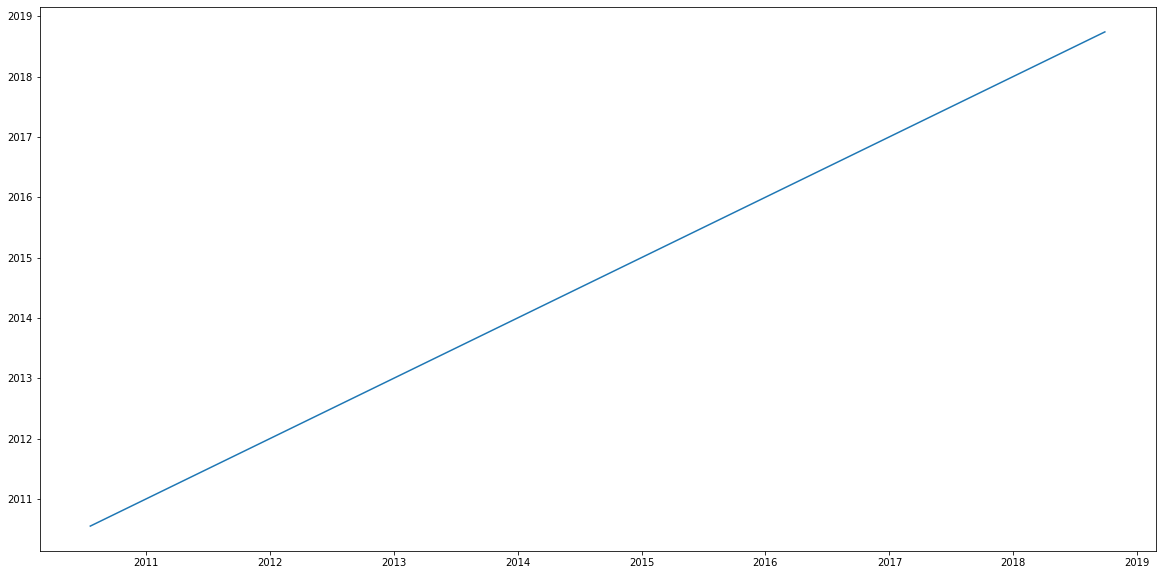

In [ ]:
data_set["Turnover (in Lakhs)"]=pd.to_datetime(data_set.Date)
data_set.index=data_set['Turnover (in Lakhs)']

plt.figure(figsize=(20,10))
plt.plot(data_set["Turnover (in Lakhs)"],label='ClosePriceHist')